# Lorenz Equations

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation as FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

In [3]:
%matplotlib notebook

## Problem 1
Write a function that implements the Lorenz equations. Let $\sigma = 10$, $\rho = 28$, $\beta = 8$ . Make a 3D plot of a solution to the Lorenz equations for an initial condition where $(x, y, z)$ are drawn randomly from a uniform distribution from −15 to 15. As usual, use `scipy .integrate.odeint` to compute the solution.

In [4]:
def lorenz(t,y):
    """Implements Lorenz equations:
    
    dx/dt = σ(y − x)
    dy/dt = ρx − y − xz
    dz/dt = xy − βz
        
    Parameters:
        x ((3,) ndarray): The state values (x,y,z)
        t (float): The time value t
    Returns:
        ((3,) ndarray): The derivative values
    """
    sigma = 10
    rou = 28
    beta = 8/3

    return np.array([sigma*(y[1]-y[0]), rou*y[0] - y[1] - y[0]*y[2], y[0]*y[1] - beta*y[2]])




<IPython.core.display.Javascript object>


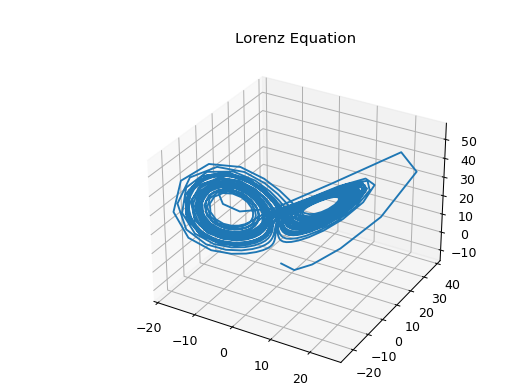

In [11]:
initial = np.random.uniform(-15,15,3)

sol = solve_ivp(lorenz, t_span = (0,40),t_eval = np.linspace(0,40,1000), y0 = initial)
#We're using t_span and t_eval, need both

#Plot the thing
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
"""
ax.set_xlim((-15,20))
ax.set_ylim((-20,30))
ax.set_zlim((-10,50))
"""

ax.plot3D(sol.y[0],sol.y[1],sol.y[2])
plt.title("Lorenz Equation")
plt.show()

## Problem 2
To better visualize the Lorenz attractor, produce a single 3D plot displaying three solutions to the Lorenz equations, each with random initial conditions.

<IPython.core.display.Javascript object>


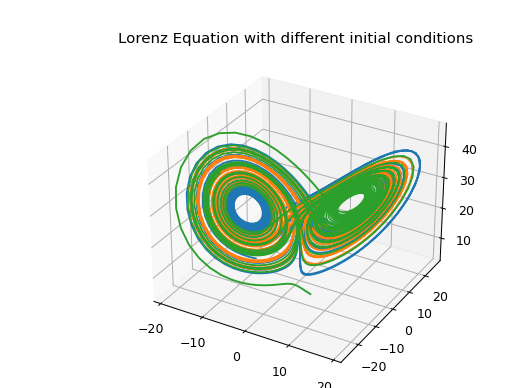

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(3):
    initial = np.random.uniform(-15,15,3)

    sol = solve_ivp(lorenz, t_span = (0,30),t_eval = np.linspace(0,30,2000), y0 = initial)
    #We're using t_span and t_eval, need both

    #Plot the thing
    ax.plot3D(sol.y[0],sol.y[1],sol.y[2])
    plt.title("Lorenz Equation with different initial conditions")
plt.show()

## Problem 3
Use `matplotlib.animation.FuncAnimation` to produce a 3D animation of two solutions to the Lorenz equations with similar initial conditions. To make similar initial conditions, draw $(x_1,y_1,z_1)$ randomly as before, and then produce $(x_2,y_2,z_2)$ by adding a small perturbation: `np.random.randn(3)*(1e-10)`. It will take several seconds before the separation between the two solutions will be noticeable.

The animation should have a point marker and the past trajectory curve for each solution. Save your animation as `lorenz_animation1.mp4`.

(Recall that you can display the saved animation in a Jupyter notebook by running the follwing code in a markdown cell):

`<video src='lorenz_animation1.mp4' controls>`

<IPython.core.display.Javascript object>


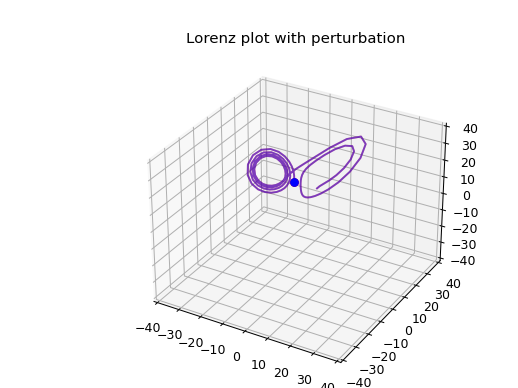

In [22]:
fig = plt.figure()

initial = np.random.uniform(-15,15,3)
sol = solve_ivp(lorenz, t_span = (0,100),t_eval = np.linspace(0,100,3000), y0 = initial)

initial2 = initial + np.random.randn(3)*(1e-10)
sol2 = solve_ivp(lorenz, t_span = (0,100),t_eval = np.linspace(0,100,3000), y0 = initial2)


# create animation
ax=fig.add_subplot(111,projection='3d')
ax.set_title("Lorenz plot with perturbation")
ax.set_xlim((-40,40))
ax.set_ylim((-40,40))
ax.set_zlim((-40,40))
sol1particle, = plt.plot([],[],[], marker='o', color='r',label="Sol1") #First Solution particle
sol1traj, = plt.plot([],[],[], color='r', alpha=0.5)


sol2particle, = plt.plot([],[],[], marker='o', color='b',label="Sol2") #Second Solution particle
sol2traj, = plt.plot([],[],[], color='b', alpha=0.5)

def update(i):
    sol1particle.set_data(sol.y[0][i],sol.y[1][i]) #For First solution
    sol1particle.set_3d_properties(sol.y[2][i])
    sol1traj.set_data(sol.y[0][:i+1],sol.y[1][:i+1])
    sol1traj.set_3d_properties(sol.y[2][:i+1])
    
    sol2particle.set_data(sol2.y[0][i],sol2.y[1][i]) #For second solution
    sol2particle.set_3d_properties(sol2.y[2][i])
    sol2traj.set_data(sol2.y[0][:i+1],sol2.y[1][:i+1])
    sol2traj.set_3d_properties(sol2.y[2][:i+1])

    return sol1particle,sol1traj, sol2particle, sol2traj
N = range(1400)
i=10
ani = animation.FuncAnimation(fig, update, frames=N, interval=i)
# render as html5 and embed
HTML(ani.to_html5_video())
ani.save('lorenz_animation.mp4') #save the animation because it takes a long time


<video src='lorenz_animation.mp4' controls>

## Problem 4
The `odeint` function allows users to specify error tolerances (similar to setting a value of $h$ for a Runge-Kutta method). Using a single random initial condition, produce two approximations by using the odeint arguments `(atol=1e-15, rtol=1e-13)` for the first approximation and `(atol=1e-12, rtol=1e-10)` for the second.
As in the previous problem, use `FuncAnimation` to animate both solutions. Save the animation as `lorenz_animation2.mp4`.

<IPython.core.display.Javascript object>


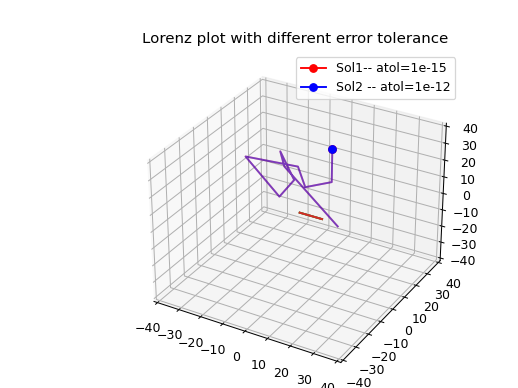

In [25]:
fig = plt.figure()

initial = np.random.uniform(-15,15,3)
sol = solve_ivp(lorenz, t_span = (0,100),t_eval = np.linspace(0,100,3000), y0 = initial,atol=1e-15,rtol=1e-13)


sol2 = solve_ivp(lorenz, t_span = (0,100),t_eval = np.linspace(0,100,3000), y0 = initial,atol=1e-12,rtol=1e-10)


# create animation
ax=fig.add_subplot(111,projection='3d')
ax.set_title("Lorenz plot with different error tolerance")
ax.set_xlim((-40,40))
ax.set_ylim((-40,40))
ax.set_zlim((-40,40))
sol1particle, = plt.plot([],[],[], marker='o', color='r',label="Sol1-- atol=1e-15") #First Solution particle
sol1traj, = plt.plot([],[],[], color='r', alpha=0.5)


sol2particle, = plt.plot([],[],[], marker='o', color='b',label="Sol2 -- atol=1e-12") #Second Solution particle
sol2traj, = plt.plot([],[],[], color='b', alpha=0.5)
plt.legend()
def update(i):
    sol1particle.set_data(sol.y[0][i],sol.y[1][i]) #For First solution
    sol1particle.set_3d_properties(sol.y[2][i])
    sol1traj.set_data(sol.y[0][:i+1],sol.y[1][:i+1])
    sol1traj.set_3d_properties(sol.y[2][:i+1])
    
    sol2particle.set_data(sol2.y[0][i],sol2.y[1][i]) #For second solution
    sol2particle.set_3d_properties(sol2.y[2][i])
    sol2traj.set_data(sol2.y[0][:i+1],sol2.y[1][:i+1])
    sol2traj.set_3d_properties(sol2.y[2][:i+1])

    return sol1particle,sol1traj, sol2particle, sol2traj
N = range(1400)
i=10
ani = animation.FuncAnimation(fig, update, frames=N, interval=i)
# render as html5 and embed
HTML(ani.to_html5_video())
ani.save('lorenz_animation2.mp4') #save the animation because it takes a long time


<video src="lorenz_animation2.mp4" controls>

## Problem 5
Estimate the Lyapunov exponent of the Lorenz equations by doing the following:
* Produce an initial condition that already lies on the attractor. This can be done by using a random "dummy" initial condition, approximating the resulting solution to the Lorenz system for a short time, and then using the endpoint of that solution (which is now on the attractor) as the desired intital condition.
* Produce a second initial condition by adding a small perturbation to the first (as before).
* For both initial conditions, use `odeint` to produce approximate solutions for $0 \leq t \leq 10$.
* Compute $||\delta(t)||$ by taking the norm of the vector difference between the two solutions for each value of $t$.
* Use `scipy.stats.linregress` to calculate a best-fit line for $\log(||\delta(t)||)$ against $t$.
* The slope of the resulting best-fit line is an approximation of the Lyapunov exponent $\lambda$.

Produce a plot similar to Figure 1.3 using `plt.semilogy`.

Hint: Remember that the best-fit line you calculated corresponds to a best-fit exponential for $||\delta(t)||$. If `a` and `b` are the slope and intercept of the best-fit line, the best-fit exponential can be plotted using `plt.semilogy(t,np.exp(a*t+b))`.

<IPython.core.display.Javascript object>


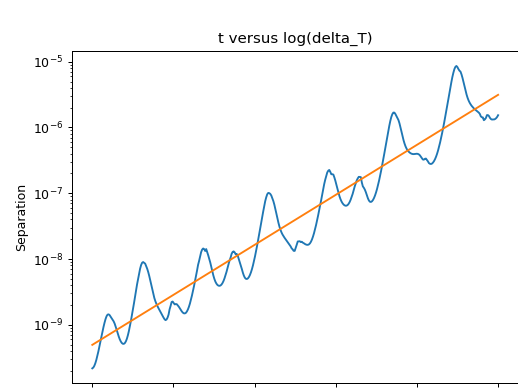

In [58]:
dummy_initial = np.random.uniform(-15,15,3) 
perturbed_dummy = dummy_initial + np.random.randn(3) *(1e-10)
sol = solve_ivp(lorenz, t_span = (0,2),t_eval = np.linspace(0,2,10), y0 = dummy_initial)
sol2 = solve_ivp(lorenz, t_span = (0,2),t_eval = np.linspace(0,2,10), y0 = perturbed_dummy)

ini1 = [sol.y[0][-1],sol.y[1][-1], sol.y[2][-1]]
ini2 = [sol2.y[0][-1],sol2.y[1][-1], sol2.y[2][-1]]



sol3 = solve_ivp(lorenz, t_span = (0,10),t_eval = np.linspace(0,10,400), y0 = ini1)
sol4 = solve_ivp(lorenz, t_span = (0,10),t_eval = np.linspace(0,10,400), y0 = ini2)

delta_T = [np.linalg.norm(np.array([sol3.y[0][i], sol3.y[1][i], sol3.y[2][i]]) - np.array([sol4.y[0][i], sol4.y[1][i], sol4.y[2][i]])) for i in range(len(sol4.y[0]))]

plt.semilogy(np.linspace(0,10,400), delta_T)

t = np.linspace(0,10,400)

a, b, r, p, se = linregress(t, np.log(delta_T))

plt.semilogy(t,np.exp(a*t+b))
plt.title("t versus log(delta_T)")
plt.xlabel("Time")
plt.ylabel("Separation")
plt.show()